## INTRODUCTION  
* Project Domain: Social media 
> Social media are interactive computer-mediated technologies that facilitate the creation or sharing of information, ideas,career interests, and other forms of expression via virtual communities and networks
 ~ *Wikipedia* 
 
* Dataset- Data obtained from Facebook and Instagram (Rough example- The real file is at fb.csv and insta.csv)
    Time | Day | Date | Year
    ------|-----|-----|-----
    6:57pm|Tuesday|Januray 10|2020
    11:40am|Saturday|March 13|2020
<br>
* Aim: To identfy patterns in the time and days I am online and to determine the time I will be online the next time I am.I would also like to identify what external factors that could impact my social media usage

* Hypotheses: I am more active during the night than day and more active during the weekend. The next most possible time I will be online is on a weekend night time

* Classification Used:  
    * kNeighbors Classifier  
    * Decision Tree classifier
    


* Findings:   
    * I am more active during the day then night  
    * I am equally active during the weekend and weekday, no actual significant difference
    * News sentiment can affect my usage of social media
    
    
* Stakeholders:  
Social media companies particularly Facebook and Instagram, online buisnesses that leverage social media to sell their items, celebrities and political organizations

## Data Analysis:

1. Dataset collected from Instagram and Facebook (Total 2 datasets)  
    * As shown above, each dataset contains time, day, date and year  

### Reading in data

In [1]:
import pandas as pd

## read csv to dataframe
fb_df = pd.read_csv("fb.csv")
insta_df = pd.read_csv("insta.csv")


## IDENTIFYING PATTERNS

#### PART 1: INVESTIGATING SOCIAL MEDIA USAGE OF DIFFERENT DAYS OF THE WEEK

#### Exploring frequency on times online on social media by days

In [2]:
#1. Explore the frequency by days

fb_days = fb_df.groupby("Day")
insta_days = insta_df.groupby("Day")
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day_df1 = pd.DataFrame()
day_df2 = pd.DataFrame()
# calculate frequency of number of times online for fb data
day_freq = []
for day in days:
    day_df1 = fb_days.get_group(day)["Day"]
    day_df2 = insta_days.get_group(day)["Day"]
    day_df1 = day_df1.append(day_df2,ignore_index=True)
    day_freq.append(len(day_df1))
    


### Exploratory Data Analysis for weekends and weekdays

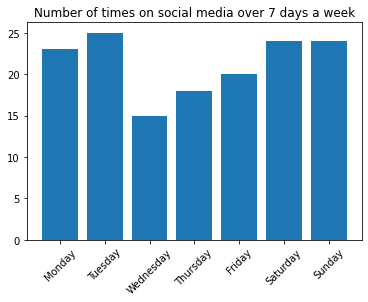

In [3]:
import matplotlib.pyplot as plt

plt.bar(days,day_freq)
plt.title("Number of times on social media over 7 days a week")
plt.xticks(rotation=45)
plt.savefig("dayfreq.png")

<details>
    <summary><b>Click to read Findings</b></summary>
  Based on the graph, we discover that:

1. I am usually least active on social media during Wednesday.   
2. I am usually active on Tuesdays compare to other days
  
</details>


### Hypothesis question: Am I more often on social media during the weekend than weekday?

Step 1:(Stating hypothesis)   
$H_o : \mu_{weekday} = \mu_{weekend}$  
$H_1 : \mu_{weekend} > \mu_{weekday}$  

Step 2:(Level of Significance)  
For testing purpose, I will just use a level of significance of 0.05

Step 3:(Test determined)  
This is a one tailed test two independent test  
df =  5 + 2-2 = 5    
t = $\frac{x_1 + x_2}{\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$  
t-value = 2.015  (If t computed is larger than 2.015, reject null hypothesis.Else do not.)

In [4]:
##Step 4:

import scipy.stats as stats
import numpy as np
import pandas as pd


alpha = 0.05
weekday_ser = pd.Series(day_freq[0:5])
weekend_ser = pd.Series(day_freq[5:7])



# ttest_ind performs a two-tailed test
t_computed, p_value = stats.ttest_ind(weekday_ser,weekend_ser)
print("t-computed:", t_computed, "p-value:", p_value/2)
if p_value/2 < alpha: 
    print("Reject H0, p-value:", p_value/2)
else:
    print("Fail to reject H0, p-value:", p_value/2)
    

t-computed: -1.2815623994965906 p-value: 0.128103804904969
Fail to reject H0, p-value: 0.128103804904969


Based on the results, I did not appear to be more active online during the weekday or weekends. t-computed is smaller than 2.105 and the p-value is larger than 0.05

#### PART 2: INVESTIGATING TIME USAGE OF SOCIAL MEDIA

For this section, data is loaded into a dataframe and cleaned  

    * Time is converted to two groups: before 5 or after 5. Before 5pm will be considered as day and after 5pm will be considered as night  
    * Outliers such as time between 1 am - 5am is deleted because it is hard to classify them as midnight or early morning. Time reflected when I was back home, so not accurate
    

In [5]:
# contains no timing outliers
fb_cleaned = pd.read_csv("fbcleaned.csv")
insta_cleaned = pd.read_csv("instacleaned.csv")

In [5]:
## Group the time before and after 5:00pm for facebook
fb_am = 0
fb_pm = 0
fb_amser =[]
fb_pmser =[]
days_week = []

fb_days = fb_df.groupby('Day')
days = fb_days.groups.keys()

#group am and pm
for day in days:
    idf = fb_days.get_group(day)
    fb_am =0
    fb_pm =0
    for fbtime in idf.iloc[:,0]:
        if(fbtime.find("am")!= -1):
            fb_am +=1
        elif(fbtime.find("pm")!= -1): #it can be before 5:00pm like 1:00,2:00,3:00pm etc. so we have to compare
            if(fbtime[1] < "5"):
                fb_am +=1
            else:
                fb_pm +=1
    fb_amser.append(fb_am)
    fb_pmser.append(fb_pm)
    days_week.append(day)
            
print("Before 5:00pm:",fb_amser,"After 5:00pm:",fb_pmser)

## Group for time before and after 5:00pm for Instagram

insta_days = insta_df.groupby('Day')
days = insta_days.groups.keys()
print(days)
insta_am = 0
insta_pm = 0
insta_amser =[]
insta_pmser = []

#group am and pm
j= 0
for day in days:
    idf = insta_days.get_group(day)
    insta_am = 0
    insta_pm =0
    for instatime in idf.iloc[:,0]:
        if(instatime.find("am")!= -1):
            insta_am +=1
        elif(instatime.find("pm")!= -1): #it can be before 5:00pm like 1:00,2:00,3:00pm etc. so we have to compare
            if(instatime[1] < "5"):
                insta_am+=1
            else:
                insta_pm +=1
                
    insta_amser.append(insta_am)
    insta_pmser.append(insta_pm)



Before 5:00pm: [6, 8, 3, 11, 7, 8, 1] After 5:00pm: [3, 6, 9, 4, 2, 2, 4]
dict_keys(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'])


In [6]:
## Total for both social media before 5:00pm and after 5:00pm 

before_5 = np.array(fb_amser) + np.array(insta_amser)
after_5 = np.array(fb_pmser) + np.array(insta_pmser)
print("Before 5:",before_5,"After 5:",after_5)


Before 5: [11 13 11 18 14 18  6] After 5: [ 9 10 13  6  4  7  9]


Text(0.5, 1.0, 'Number of times online before 5pm and after 5pm each day')

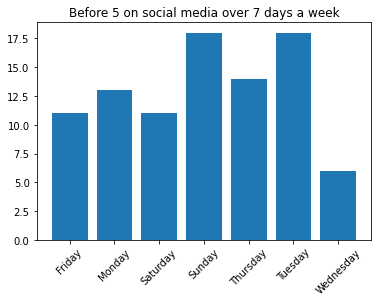

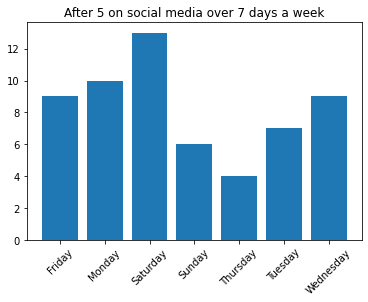

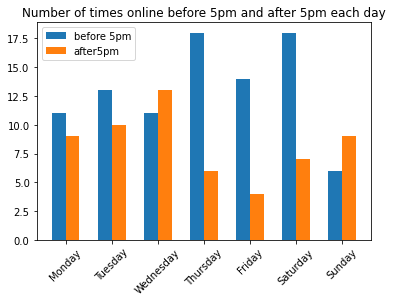

In [7]:
## Visualization of time before and after each day
import matplotlib.pyplot as plt

plt.bar(days_week,before_5)
plt.title("Before 5 on social media over 7 days a week")
plt.xticks(rotation=45)
plt.savefig("daybyTimebefore5freq.png")

plt.figure()
plt.bar(days_week,after_5)
plt.title("After 5 on social media over 7 days a week")
plt.xticks(rotation=45)
plt.savefig("daybyTimeafter5freq.png")

N=7
width =0.3
ind = np.arange(N)
plt.figure()
plt.bar(ind,before_5,width,label="before 5pm")
plt.bar(ind+width,after_5,width,label="after5pm")
#plt.xlabels()
plt.legend()
plt.xticks(ind+width/2,('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.xticks(rotation=45)
plt.title("Number of times online before 5pm and after 5pm each day")


<details>
    <summary><b>Click to read findings</b></summary>
  Based on the graph, we discover that:

1. I am more active on social media during the day time(before 5pm), then after 5pm.   
  
</details>

### Hypothesis question: Am I more active online on Social media during the day(before 5:00pm) than night(after 5:00pm)

Step 1:(Stating hypothesis and null hypothesis)  
$H_o: \mu_{before5} = \mu_{after5}$  
$H_o : \mu_{before5} > \mu_{after5}$  

Step 2:(Choosing significance level)  
I will choose a significance level of 0.05

Step 3:(Identifying type of test to use)  
We will use a two sample independent test but one tailed because a direction is present  
df = 7 + 7 -2  
t- value = 1.782  
t = $\frac{x_1 + x_2}{\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$  
If t-computed is larger than t-value, we reject the null hypothesis; else do not.


In [8]:
## Step 4:
alpha = 0.05
# ttest_ind performs a two-tailed test
t_computed, p_value = stats.ttest_ind(before_5,after_5)
print("t-computed:", t_computed, "p-value:", p_value/2)
if p_value/2 < alpha: 
    print("Reject H0, p-value:", p_value/2)
else:
    print("Fail to reject H0, p-value:", p_value/2)

t-computed: 2.419677397852329 p-value: 0.016168243699838897
Reject H0, p-value: 0.016168243699838897


Since the p value is smaller than 0.05, and the t-computed is larger than 1.782, we reject the null hypothesis. Therefore, I am more active on social media during the day than night

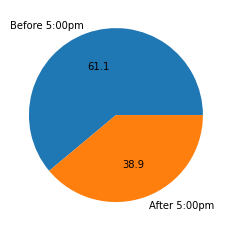

In [9]:
## VISUALIZE DATA

before_5sum = np.sum(before_5)
after_5sum = np.sum(after_5)

labels= ["Before 5:00pm","After 5:00pm"]
media_percent = [before_5sum,after_5sum]
plt.pie(media_percent,labels =labels,autopct='%.1f')
plt.savefig("time.png")

Based on the graph, we can see that the number of times I have been online before 5:00pm is larger and takes 61.1% of the time while only 36.9% of the times I am online, is after 5:00pm

## Statistical Analysis Conclusions:  
1. Carried out a two sample one tailed test for the number of days to answer the question if I am more active during weekends(Saturday and Sunday), significance level = 0.05  
Result found: Not significant, p computed is 0.128  

2. Carried out a similar test on the times online to answer the question if I am more active during night than day?, significance value =0.10  
Result found : I am significantly more active on day than night, p computed is 0.056

# CLASSIFICATION

Determining the next time I will be online during the day(before 5:00pm) or night(after 5:00pm) given a specific day

Since the data are all stored as strings, I will have to give a numeric value to the days and time I will have to change to two instances- before 5:00pm and after 5:00pm, which have been done in the previous section to visualize time



1. To obtained a test result, I collected data manually for a week after onw week of finishing the implementation to avoid confirmation biases   
Question explored: What time will be the next time I am online on a social media account given a specific day

Approach to classification:  
1. Encode labeled days to be 0,1,2,3..7 instead of Monday, Tuesday,etc.  
3. Encode labeled social media to be either 1 or 0 too, to indicate Facebook for 0 and 1 for Instagram  

Classifier Used:  
* kNN neighbors classifier  
* Decision Tree classifier

In [10]:
s_dfclass = pd.read_csv("cleanedSM.csv")
print(s_dfclass)


s_days = s_dfclass.groupby("Day")
before_5 =[]
after_5 =[]
fbday_freq = []

for day in days :
    s_df = s_days.get_group(day)
    time_df = s_dfclass.groupby("Time")
    #print(day_df)
    after_5.append(len(time_df.get_group("after5")))
    before_5.append(len(time_df.get_group("before5")))



        Time        Day  Date  Year  Social Media      Month
0     after5   Saturday    28  2020           0.0    October
1    before5     Sunday    25  2020           0.0    October
2    before5    Tuesday    13  2020           0.0    October
3     after5  Wednesday    30  2020           0.0  September
4     after5     Monday    28  2020           0.0  September
..       ...        ...   ...   ...           ...        ...
130   after5     Friday    18  2019           1.0    October
131  before5    Tuesday     1  2019           1.0    October
132  before5   Thursday    19  2019           1.0  September
133  before5     Monday    19  2019           1.0     August
134   after5   Saturday     3  2019           1.0     August

[135 rows x 6 columns]


#### Now that we have change the values, let us use the kNN hold out method

In [11]:
from sklearn import preprocessing

y = s_dfclass["Time"]
X = s_dfclass.drop("Time", axis=1)
X = X.drop("Date",axis =1)
X = X.drop("Year",axis=1)

##Convert data to be numerial
le = preprocessing.LabelEncoder()
le.fit(X["Social Media"])
X["Social Media"] = le.transform(X["Social Media"])
le.fit(X["Day"])
X["Day"] = le.transform(X["Day"])
le.fit(X["Month"])
X["Month"] = le.transform(X["Month"])


In [12]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 0,stratify=y)# random state for reproducility so that we will always get same data
clf = KNeighborsClassifier(n_neighbors=20, metric="euclidean")
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(accuracy)



0.5882352941176471


### Decision Tree Classifier Method

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=0,max_depth=3)
tree_clf.fit(X_train, y_train)
y_predicted_tree = tree_clf.predict(X_test)
accuracy_tree = tree_clf.score(X_test, y_test)
print(accuracy_tree)


0.5588235294117647


In [14]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

for model in [clf, tree_clf]:
    print(type(model))
    accuracies = cross_val_score(model, X, y, cv=5)
    print(accuracies, accuracies.mean())
    y_predictions = cross_val_predict(model, X, y, cv=5) # GS: look into random_state for this one
    # better estimate of accuracy
    accuracy = accuracy_score(y, y_predictions)
    print(accuracy)
    

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
[0.51851852 0.59259259 0.33333333 0.59259259 0.59259259] 0.5259259259259259
0.5259259259259259
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
[0.48148148 0.66666667 0.2962963  0.62962963 0.55555556] 0.5259259259259259
0.5259259259259259


#### Based on k Hold out test, the accuracy for both kNN is 0.526

#### In an attempt to test the predictions, on what time I will spend on social media, I spend a week self collecting data. This data was collected a week after I did this project so that I am not biased or conscious when using my social media. I try to be online each day of self collecting data and then note the time

In [15]:
#Predict using KNNneighbors classifier
X_self_test = [[0,0,12],[1,0,12],[2,1,12],[3,0,12],[4,0,12],[5,1,12],[6,0,12]]
actual_y = ["after5","before5","before5","after5","after5","before5","after5"]
y_predicted_val = clf.predict(X_self_test)
print(y_predicted_val)
y_predcted_val = tree_clf.predict(X_self_test)
print(y_predicted_val)

['after5' 'before5' 'before5' 'before5' 'after5' 'after5' 'after5']
['after5' 'before5' 'before5' 'before5' 'after5' 'after5' 'after5']


However, on the week of self collecting data, both have accuracy of 0.714

The accuracy is not very high because of the number of features on this dataset.

## External Factors that could potentially affect my social media usage

### Identifying the correlation of news sentiment and the number of times online

To identfy what causes me to go online on social media, I try to determine if positive or negative news will motivate me to go online. [This](https://docs.aylien.com/newsapi/#getting-started) is the API website I used.

I run this segment of code for changing the days during my self collection date and note the sentiment. The list of sentiment and day and social media online status online can be found in news.csv

In [18]:
import requests
import json
import pandas as pd
import matplotlib.pyplot
from textblob import TextBlob

api_id = "0a9c9021"
api_key= "6674c0726f47feea44d5970a9b70275f"
#for meteor stats api requires your api key be in the request headers not in url query params like mapQuest
headers= {"X-AYLIEN-NewsAPI-Application-ID":api_id,
           "X-AYLIEN-NewsAPI-Application-Key":api_key
         }


url = "https://api.aylien.com/news/stories?published_at.start=NOW-2DAY/DAY"
response = requests.get(url=url,headers=headers)
json_object =  json.loads(response.text)
j1 = json_object['stories'][0]['body']
blob = TextBlob(j1)
print(blob.sentiment[0])

0.13344715629198386


### Below is the data collected throughout my period of self testing together with news sentiment

In [21]:
news_df = pd.read_csv("news.csv")
print(news_df)

         Day         Date  News Sentiment Online Status
0  Wednesday   December 9       -0.126400           Yes
1   Thursday  December 10       -0.016700            No
2     Friday  December 11        0.356700            No
3   Saturday  December 12        0.018300           Yes
4     Sunday  December 13        0.017800           Yes
5     Monday  December 14        0.102789            No
6    Tuesday  December 15       -0.227500           Yes
7  Wednesday  December 16       -0.349520           Yes


To measure dependency of the two, I used another t-test. Am I more ofte online when the news sentiment is good or when it is negative?

Step 1:(Stating hypothesis)   
$H_o : \mu_{online} = \mu_{offline}$  
$H_1 : \mu_{offline} > \mu_{online}$  

Step 2:(Level of Significance)  
For testing purpose, I will just use a level of significance of 0.05

Step 3:(Test determined)  
This is a two tailed test two independent test  
df =  5 + 3-2 = 6  
t = $\frac{x_1 + x_2}{\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$  
t-value = 1.943 (If t computed is larger than 1.943, reject null hypothesis.Else do not.)

In [22]:
# Grouping data by offline or online

off_on = news_df.groupby("Online Status")
online = off_on.get_group("Yes")
online_sent = online["News Sentiment"]
print(online_sent)
offline  =off_on.get_group("No")
offline_sent = offline["News Sentiment"]
print(offline_sent)

## carying out t test
## Step 4:
alpha = 0.05
# ttest_ind performs a one-tailed test
t_computed, p_value = stats.ttest_ind(offline_sent,online_sent)
print("t-computed:", t_computed, "p-value:", p_value/2)
if p_value/2 < alpha: 
    print("Reject H0, p-value:", p_value/2)
else:
    print("Fail to reject H0, p-value:", p_value/2)

0   -0.12640
3    0.01830
4    0.01780
6   -0.22750
7   -0.34952
Name: News Sentiment, dtype: float64
1   -0.016700
2    0.356700
5    0.102789
Name: News Sentiment, dtype: float64
t-computed: 2.258591336455928 p-value: 0.03233658858187175
Reject H0, p-value: 0.03233658858187175


<details>
    <summary><b>Click to read findings!</b></summary>
  Based on my findings, it seems that the news sentiment is generally more positive when I am offline compare to when I am online. This is an interesting finding that can help provide some support as to when I am on social media  
  
</details>


Given this analysis, some ways to improve this project and its classification accuracy is to:  
1. Add number of features- that is caried out news analysis sentiment  
2. Increase number of data

## Conclusion

I found it facinating that what I initially predicted is contrary to what I learned about myself. I used to think that I am more active on social media during the weekend than weekdays and more active after 5 pm than before 5pm.
However, I found out that:

1. My social media usage is not dependent on the days, whether it is a weekend or weekday  
2. I am more active on social media before 5:00pm, then after 5:00pm

In an attempt to learn more about what could possibly influence my social media usage, I turn to news sentiment.
Based on the news sentiment analysis, I found out that the sentiment mean when I am offline is more positive than when I am offline.

Ratiionalizing my findings, I have come to conclude that I am more active on social media during times where I am unhappy or something bad happened that day than when I am in a good mood. This explains why I am more active during the day and night, given more stress, classes and homework during the day. I usually spend my weekends doing homework too, so probably is the reason why there is no difference in days. Social media is probably a way for me to cope; take my mind off things

## Ethical Impacts

1. I think it is a very interesting perspective on how social media has become an integral part of our life, yet it is detached from reality. During bad and stressful times, I have turned to social media for comfort, which in return might not offer the same. It is as if social media has create an alternate world for me to be in

2. Knowing this, I think stakeholders of this project would try to further detached themselves from reality, by creating an addictive, painless world so that people who face difficult times or situation are even more proned to being online for a long time

3. This creates a serious mental issue. If social media does tries to exploit people during times when they are vulnerable, I think it is an important issue to notice